# Learning Curve Generation

In [18]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [20]:
train_data = pd.read_csv('https://autogluon.s3.amazonaws.com/datasets/Inc/train.csv')
test_data = pd.read_csv('https://autogluon.s3.amazonaws.com/datasets/Inc/test.csv')

subsample_size = 500  # subsample subset of data for faster demo, try setting this to much larger values
train_data = train_data.sample(n=subsample_size, random_state=0)
test_data = test_data.sample(n=subsample_size, random_state=0)

# only train select models for faster demo
hyperparameters = {
    "GBM": {},
    "XGB": {},
}

clean = {
    "verbosity": 0,
    "hyperparameters": hyperparameters,
}

## Simple Usage

In [21]:
predictor = TabularPredictor(label="age", problem_type="regression")
predictor = predictor.fit(train_data=train_data, test_data=test_data, learning_curves=True, **clean)
predictor.learning_curves()

No path specified. Models will be saved in: "AutogluonModels/ag-20240718_204216"


[{'problem_type': 'regression',
  'eval_metric': 'root_mean_squared_error',
  'num_classes': None,
  'num_rows_train': 400,
  'num_rows_val': 100,
  'num_rows_test': 500,
  'models': [{'model_type': 'LGBModel',
    'stopping_metric': 'root_mean_squared_error',
    'hyperparameters': {'learning_rate': 0.05},
    'hyperparameters_fit': {'num_boost_round': 90},
    'ag_args_fit': {'max_memory_usage_ratio': 1.0,
     'max_time_limit_ratio': 1.0,
     'max_time_limit': None,
     'min_time_limit': 0,
     'valid_raw_types': ['bool', 'int', 'float', 'category'],
     'valid_special_types': None,
     'ignored_type_group_special': None,
     'ignored_type_group_raw': None,
     'get_features_kwargs': None,
     'get_features_kwargs_extra': None,
     'predict_1_batch_size': None,
     'temperature_scalar': None,
     'generate_curves': True,
     'curve_metrics': ['root_mean_squared_error',
      'mean_squared_error',
      'mean_absolute_error',
      'median_absolute_error',
      'r2'],
  

## Advanced Usage

No path specified. Models will be saved in: "AutogluonModels/ag-20240718_204341"


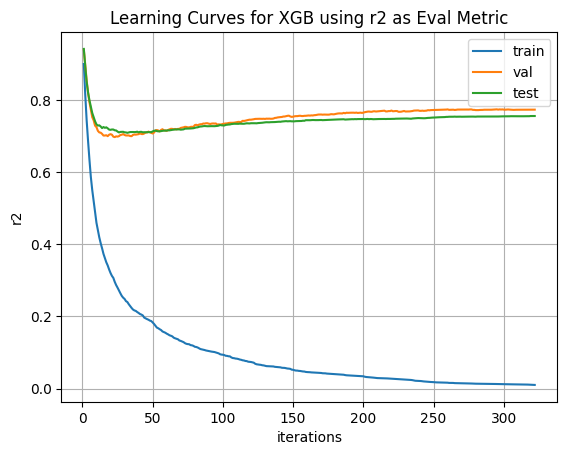

In [22]:
params = {
    "metrics": "r2", # or ["r2", "mean_absolute_error"]
    "use_error": True
}

predictor = TabularPredictor(label="age", problem_type="regression")
predictor = predictor.fit(train_data=train_data, test_data=test_data, learning_curves=params, **clean)
predictor.plot_curves("XGB", "r2")

# Stopping Simulation and Ranking

In [1]:
from stopping_simulator.EarlyStoppingSimulator import StoppingSimulator

## Simple Usage

In [24]:
simulator = StoppingSimulator()
simulator.load_curves("learning_curves/2/")
simulator.rank()

,params,rank,strategy
0,"{'a': 0.25, 'b': 15}",48.833333,adaptive_patience
1,"{'a': 0.05, 'b': 25}",48.877778,adaptive_patience
2,"{'a': 0.15000000000000002, 'b': 20}",49.100000,adaptive_patience
3,"{'a': 0.0, 'b': 35}",49.116667,adaptive_patience
4,{'patience': 35},49.116667,simple_patience
...,...,...,...
127,"{'a': 0.15000000000000002, 'b': 0}",100.466667,adaptive_patience
128,"{'a': 0.1, 'b': 0}",105.327778,adaptive_patience
129,"{'a': 0.05, 'b': 0}",105.838889,adaptive_patience
130,{'patience': 0},108.727778,simple_patience


## Customizing Strategy Configs

In [4]:
oneConfig = {
    "simple_patience": { "patience": 10 },
    "adaptive_patience": { "a": 0.2, "b": 20 },
}

manyConfigs = {
    "simple_patience": { "patience": [0, 10, 50, 65] },
    "adaptive_patience": { "a": [0.01, 0.05, 0.1, 0.25, 0.5], "b": 20 },
}

rangeConfigs = {
    "simple_patience": { "patience": (0, 500, 1) },
    "adaptive_patience": { "a": (0, 0.5, 0.01), "b": (0, 50, 1) },
}

# simulator = StoppingSimulator()
# simulator.load_curves("learning_curves/10/")
# simulator.rank(strategies=rangeConfigs, eval_set="val")

In [1]:
import pandas as pd
from stopping_simulator.EarlyStoppingSimulator import StoppingSimulator
simulator = StoppingSimulator()
simulator.simulations = pd.read_csv("test.csv")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

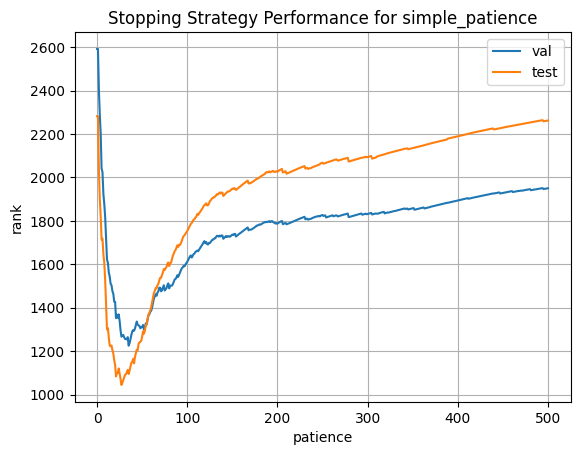

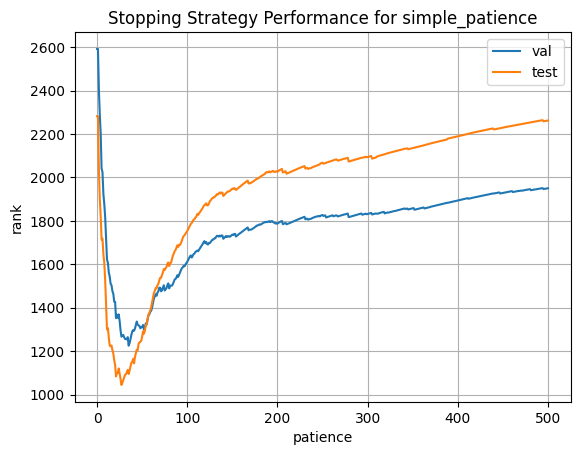

In [2]:
from matplotlib import pyplot as plt

rangeConfigs = {
    "simple_patience": { "patience": (0, 500, 1) },
    "adaptive_patience": { "a": (0, 0.5, 0.01), "b": (0, 50, 1) },
}

simulator.plot("simple_patience", "val")


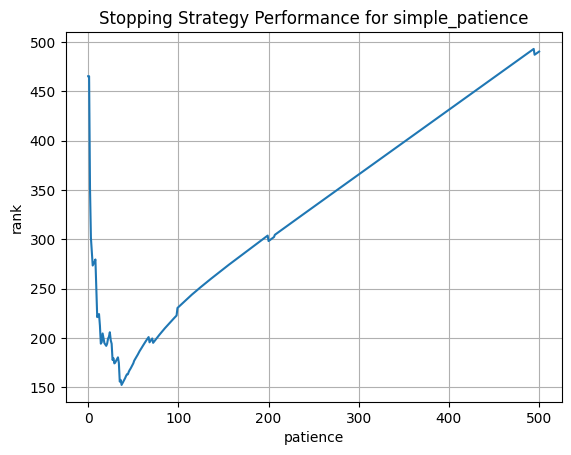

In [26]:
simulator.plot("simple_patience")

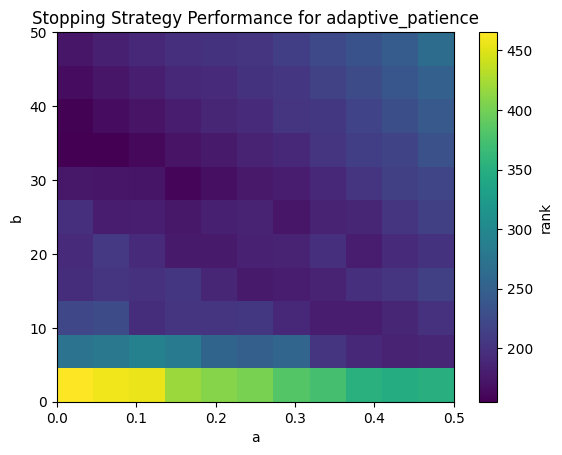

In [27]:
simulator.plot("adaptive_patience")

In [11]:
# (100 * 500 * 150) / 8 + 750 = 938250 configs
rangeConfigs = {
    "simple_patience": { "p": (0, 750, 1) }, # 750
    "polynomial_adaptive_patience": { "a": (0.01, 1, 0.02), "b": (0, 500, 2), "degree": (0.1, 1.5, 0.02) },
}

simulator = StoppingSimulator()
simulator.load_curves("learning_curves/10/")
simulator.rank(strategies=rangeConfigs, eval_set="val")

,params,rank,strategy
0,"{'a': 0.35000000000000003, 'b': 25, 'degree': ...",621.300000,polynomial_adaptive_patience
1,"{'a': 0.45, 'b': 25, 'degree': 0.3000000000000...",622.250000,polynomial_adaptive_patience
2,"{'a': 0.4, 'b': 25, 'degree': 0.30000000000000...",622.250000,polynomial_adaptive_patience
3,"{'a': 0.3, 'b': 25, 'degree': 0.4}",622.611111,polynomial_adaptive_patience
4,"{'a': 0.5, 'b': 25, 'degree': 0.30000000000000...",622.816667,polynomial_adaptive_patience
...,...,...,...
1645,"{'a': 0.05, 'b': 0, 'degree': 0.2}",1355.361111,polynomial_adaptive_patience
1646,"{'a': 0.05, 'b': 0, 'degree': 0.6}",1355.361111,polynomial_adaptive_patience
1647,"{'a': 0.05, 'b': 0, 'degree': 0.5}",1355.361111,polynomial_adaptive_patience
1648,"{'a': 0.05, 'b': 0, 'degree': 0.4}",1355.361111,polynomial_adaptive_patience


In [10]:
import pandas as pd
pd.DataFrame(simulator.ranks)

,params,rank,strategy
0,"{'a': 0.4, 'b': 25, 'degree': 0.30000000000000...",690.838889,polynomial_adaptive_patience
1,"{'a': 0.45, 'b': 25, 'degree': 0.3000000000000...",690.838889,polynomial_adaptive_patience
2,"{'a': 0.30000000000000004, 'b': 25, 'degree': ...",691.200000,polynomial_adaptive_patience
3,"{'a': 0.35000000000000003, 'b': 25, 'degree': ...",691.222222,polynomial_adaptive_patience
4,"{'a': 0.2, 'b': 25, 'degree': 0.5}",691.405556,polynomial_adaptive_patience
...,...,...,...
1810,"{'a': 0.0, 'b': 0, 'degree': 0.7000000000000001}",1487.361111,polynomial_adaptive_patience
1811,"{'a': 0.0, 'b': 0, 'degree': 0.8}",1487.361111,polynomial_adaptive_patience
1812,"{'a': 0.0, 'b': 0, 'degree': 0.9}",1487.361111,polynomial_adaptive_patience
1813,"{'a': 0.25, 'b': 0, 'degree': 0.1}",1487.361111,polynomial_adaptive_patience


# Debugging

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
from stopping_simulator.EarlyStoppingSimulator import StoppingSimulator

rangeConfigs = {
    "simple_patience": { "patience": (0, 500, 1) }, # 150 positions
    # "adaptive_patience": { "a": (0, 0.5, 0.01), "b": (0, 50, 1) }, # 50 * 50 = 2500 positions
}

s = StoppingSimulator()
s.load_curves("learning_curves/10/190137/0")
s.rank(strategies=rangeConfigs, eval_set="test")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3030546/3297732129.py", line 10, in <module>
    s.rank(strategies=rangeConfigs, eval_set="test")
  File "/home/ubuntu/autogluon/stopping_simulator/EarlyStoppingSimulator.py", line 139, in rank
    stopping_curve = metric_curves[i][1] # always stop on val
  File "/home/ubuntu/autogluon/stopping_simulator/EarlyStoppingSimulator.py", line 80, in run
    self.tasks.append(json.load(f))
  File "/home/ubuntu/autogluon/stopping_simulator/EarlyStoppingSimulator.py", line 114, in param_search
  File "/home/ubuntu/autogluon/stopping_simulator/EarlyStoppingSimulator.py", line 132, in eval_config
    t = task[0]
  File "/home/ubuntu/autogluon/stopping_simulator/strategies/AbstractStrategy.py", line 14, in simulate
    best_iter, total_iter = self._run(stopping_curve)
  File "/home/u

In [ ]:
s.plot("simple_patience")

In [ ]:
s.simulations.to_csv("test.csv")

In [ ]:
ranks = s.simulations.copy()

ranks = ranks[ranks["eval_set"] == "val"]
ranks['superscore'] = list(zip(ranks['percent_score_diff'], ranks['percent_iter_diff']))

groups = ranks.groupby(["dataset", "fold", "model", "metric"]).apply(lambda x: x)

# # dataset = groups['dataset'] == 'Australian'
# model = groups['model'] == 'GBM'
# metric = groups['metric'] == "accuracy"

# one_group = groups[model & metric]
# one_group["rank"] = one_group["superscore"].rank()
# one_group.sort_values(by="rank")



In [ ]:
ranks = s.simulations.copy()

ranks = ranks[ranks["eval_set"] == "val"]
ranks['superscore'] = list(zip(ranks['percent_score_diff'], ranks['percent_iter_diff']))
ranks["rank"] = ranks.groupby(["dataset", "fold", "model", "metric"])["superscore"].rank()

ranks = ranks.groupby("params")["rank"].mean()
ranks = ranks.sort_values().reset_index()

ranks

In [ ]:
import json


In [ ]:
simulator.ranks

In [ ]:
df = simulator.simulations.copy()
df = df[df["eval_set"] == "val"]
df

In [ ]:
df = simulator.simulations.copy()
df = df[df["eval_set"] == "val"]
df

simple = df[df["strategy"] == "simple_patience"]
adaptive = df[df["strategy"] == "adaptive_patience"]

simple["p"] = simple["params"].apply(lambda x: json.loads(x.replace("'", '"'))["patience"])

adaptive["params"] = adaptive["params"].apply(lambda x: json.loads(x.replace("'", '"')))
adaptive["a"] = adaptive["params"].apply(lambda x: x["a"])
adaptive["b"] = adaptive["params"].apply(lambda x: x["b"])

del simple["params"]
del adaptive["params"]

simple = simple[simple["p"] <= 50]
adaptive = adaptive[adaptive["a"] == 0]

adaptive["p"] = adaptive["b"]
del adaptive["a"]
del adaptive["b"]

adaptive = adaptive.reset_index()
simple = simple.reset_index()

del simple["index"]
del adaptive["index"]

del simple["strategy"]
del adaptive["strategy"]

from pandas.testing import assert_frame_equal
assert_frame_equal(simple, adaptive)

In [ ]:
simple

In [ ]:
adaptive

In [ ]:
from pandas.testing import assert_frame_equal
assert_frame_equal(simple, adaptive)

In [ ]:
simulator.ranks.to_csv("ranks.csv")

In [ ]:
from stopping_simulator.EarlyStoppingSimulator import StoppingSimulator

rangeConfigs = {
    "simple_patience": { "patience": (0, 500, 1) }, # 150 positions
    # "adaptive_patience": { "a": (0, 0.5, 0.01), "b": (0, 50, 1) }, # 50 * 50 = 2500 positions
}

s = StoppingSimulator()
s.load_curves("learning_curves/10/190137/0")
s.rank(strategies=rangeConfigs, eval_set="test")

In [ ]:
s.plot("simple_patience")

In [ ]:
s.simulations

In [ ]:
v = StoppingSimulator()
v.load_curves("learning_curves/10/2073/0")
v.rank(strategies=rangeConfigs, eval_set="val")
v.plot("simple_patience")

In [ ]:
s.simulations.to_csv("test.csv")

In [ ]:
s[s[""]]

In [ ]:
predictor = TabularPredictor(label="age", problem_type="regression")

predictor.learning_curves()